
![](https://www.vmcdn.ca/f/files/kitchenertoday/images/health-and-fitness/covid-19-village-media.jpg)



# **Análisis del COVID-19 en Colombia**
## **Trabajo final: Analisis Predictivo y gestión de datos**

*Presentado por:*

- *Paula Andrea Solano Pardo*
- *Jenssy Johanna Garces Parra*
- *Ingrid Alexandra Aponte Caro*


**Paso 1**:

Importar las librerias que vamos a utilizar en el desarrollo del ejercicio. En este caso, importamos en primer lugar Pandas para la administración de las bases de datos, seguido de matplotlib que no ayuda con las graficas.

In [67]:
#En esta linea se importan las librerias a utilizar

import pandas as pd
import matplotlib.pyplot as plt

**Paso 2:**

Cargar la base de datos que vamos a utilizar para el desarrollo del ejercicio, en este caso, utilizamos una base de datos relacionadas en la página "Datos abiertos Colombia" que contine información a cerca del COVID- 19. esta base se carga directamente desde la página de internet.

La base, tiene 6,39 millones de filas y 23 columnas, en las que se presenta la siguiente información:

- Fecha_reporte_web

- Id_de_caso	fecha_de_notificaci_n

- Departamento

- Departamento_nom

- Ciudad_municipio

- Ciudad_municipio_nom

- Edad

- Unidad_medida

- Sexo

- Tipo de contagio

- Ubicación del caso

- Estado

- Código ISO del país

- Nombre del país   


In [68]:

# Cargar el archivo
%pip install pyxlsb
df = pd.read_excel('/workspaces/Intriduccion_Github/Datos/Casos_positivos_de_COVID-19_2.xlsb', engine='pyxlsb',
sheet_name='Casos_positivos_de_COVID-19_en_')

# Ver los primeros registros
print(df.head())




[notice] A new release of pip is available: 25.0.1 -> 25.1.1
[notice] To update, run: python -m pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.
   ID de caso Nombre departamento Nombre municipio  Edad  \
0     1556979               VALLE             CALI    67   
1     1556980               VALLE             CALI    66   
2     1556981               VALLE             CALI    68   
3     1556982               VALLE             CALI    74   
4     1556983               VALLE             CALI    65   

   Unidad de medida de edad Sexo Tipo de contagio UbicaciÃ³n del caso  \
0                         1    F      Comunitaria                Casa   
1                         1    F      Comunitaria                Casa   
2                         1    F      Comunitaria                Casa   
3                         1    F      Comunitaria           Fallecido   
4                         1    F      Comunitaria                Casa   

      Estad

## Paso 3: Revisar la estructura del dataframe

In [69]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048575 entries, 0 to 1048574
Data columns (total 11 columns):
 #   Column                    Non-Null Count    Dtype 
---  ------                    --------------    ----- 
 0   ID de caso                1048575 non-null  int64 
 1   Nombre departamento       1048575 non-null  object
 2   Nombre municipio          1048575 non-null  object
 3   Edad                      1048575 non-null  int64 
 4   Unidad de medida de edad  1048575 non-null  int64 
 5   Sexo                      1048575 non-null  object
 6   Tipo de contagio          1048575 non-null  object
 7   UbicaciÃ³n del caso       1044230 non-null  object
 8   Estado                    1044230 non-null  object
 9   Nombre del paÃ­s          250 non-null      object
 10  Recuperado                1044979 non-null  object
dtypes: int64(3), object(8)
memory usage: 88.0+ MB


In [70]:
df.shape

(1048575, 11)

In [71]:
#En esta linea, creamos una copia de la base original, con el objetivo de no modificar los datos originales

df_2=df.copy()

In [72]:
#se cambia el nombre de las variables con el fin de eliminsar caracteres especiales

df_2.rename(columns={'UbicaciÃ³n del caso': 'Ubicacion del caso'}, inplace=True)
df_2.rename(columns={'Nombre del paÃ­s': 'Nombre del pais'}, inplace=True)

In [73]:
# Verificar el cambio de nombre en als columnas

print(df_2.columns.tolist())

['ID de caso', 'Nombre departamento', 'Nombre municipio', 'Edad', 'Unidad de medida de edad', 'Sexo', 'Tipo de contagio', 'Ubicacion del caso', 'Estado', 'Nombre del pais', 'Recuperado']


## Paso 4: Descripción estadística general

In [74]:
df_2.describe(include='all')

,ID de caso,Nombre departamento,Nombre municipio,Edad,Unidad de medida de edad,Sexo,Tipo de contagio,Ubicacion del caso,Estado,Nombre del pais,Recuperado
count,1.048575e+06,1048575,1048575,1.048575e+06,1.048575e+06,1048575,1048575,1044230,1044230,250,1044979
unique,NaN,37,1036,NaN,NaN,4,3,4,3,32,3
top,NaN,BOGOTA,BOGOTA,NaN,NaN,F,Comunitaria,Casa,Leve,ESTADOS UNIDOS DE AMÃ‰RICA,Recuperado
freq,NaN,316114,316114,NaN,NaN,552710,661834,1015144,1015641,97,1016788
mean,2.585944e+06,NaN,NaN,3.963330e+01,1.003176e+00,NaN,NaN,NaN,NaN,NaN,NaN
std,1.021715e+06,NaN,NaN,1.772279e+01,6.087230e-02,NaN,NaN,NaN,NaN,NaN,NaN
min,4.150000e+02,NaN,NaN,1.000000e+00,1.000000e+00,NaN,NaN,NaN,NaN,NaN,NaN
25%,2.474460e+06,NaN,NaN,2.700000e+01,1.000000e+00,NaN,NaN,NaN,NaN,NaN,NaN
50%,2.822523e+06,NaN,NaN,3.800000e+01,1.000000e+00,NaN,NaN,NaN,NaN,NaN,NaN
75%,3.366734e+06,NaN,NaN,5.200000e+01,1.000000e+00,NaN,NaN,NaN,NaN,NaN,NaN


## Paso 5: Visualización exploratoria

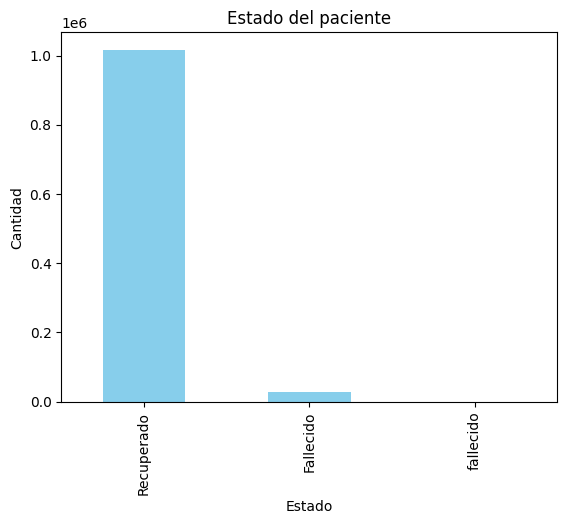

In [75]:
df_2['Recuperado'].value_counts().plot(kind='bar', color='skyblue')
plt.title('Estado del paciente')
plt.xlabel('Estado')
plt.ylabel('Cantidad')
plt.show()



In [76]:
### Hayazgo: corregir la palabra fallecido para que solo este con mayuscula inicial
df_2['Recuperado'] = df_2['Recuperado'].str.replace('fallecido', 'Fallecido')

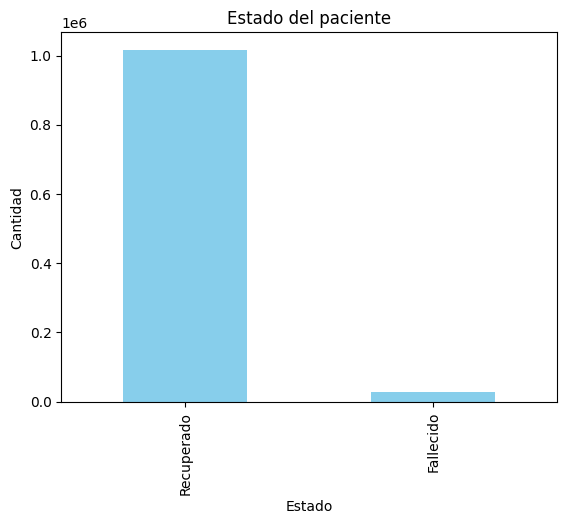

In [77]:

###Se corre la linea nuevamente con el fin de verificar que se corrigió el dato duplicado

df_2['Recuperado'].value_counts().plot(kind='bar', color='skyblue')
plt.title('Estado del paciente')
plt.xlabel('Estado')
plt.ylabel('Cantidad')
plt.show()


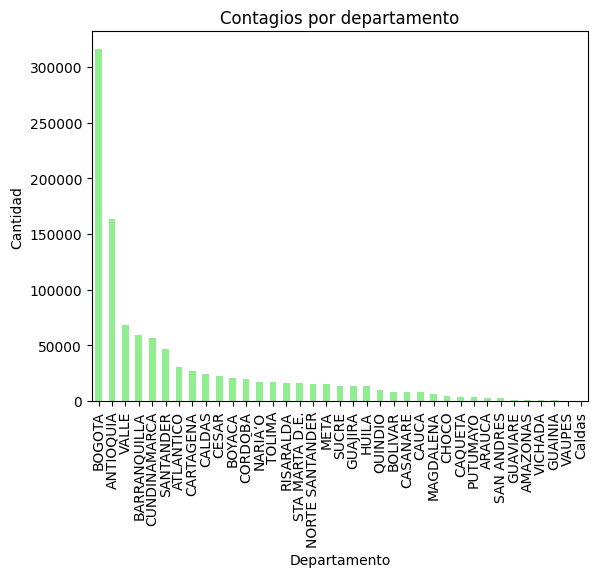

In [78]:
df_2['Nombre departamento'].value_counts().plot(kind='bar', color='lightgreen')
plt.title('Contagios por departamento')
plt.xlabel('Departamento')
plt.ylabel('Cantidad')
plt.show()

In [79]:
# Ver el nombre de las variables que hay dentro de la columna "Nombre departamento"

df['Nombre departamento'].unique()

array(['VALLE', 'ANTIOQUIA', 'BOGOTA', 'SANTANDER', 'NORTE SANTANDER',
       'CALDAS', 'CUNDINAMARCA', 'CAQUETA', 'QUINDIO', 'RISARALDA',
       'CASANARE', 'NARIÃ‘O', 'HUILA', 'CESAR', 'META', 'STA MARTA D.E.',
       'TOLIMA', 'CAUCA', 'BARRANQUILLA', 'SUCRE', 'CARTAGENA', 'BOLIVAR',
       'GUAJIRA', 'ATLANTICO', 'CORDOBA', 'MAGDALENA', 'ARAUCA', 'BOYACA',
       'SAN ANDRES', 'CHOCO', 'GUAVIARE', 'VICHADA', 'PUTUMAYO', 'VAUPES',
       'GUAINIA', 'AMAZONAS', 'Caldas'], dtype=object)

In [80]:
## Hayazgo: Corregir el mombre de los departamentos  caldas ya que aparece repetido. y ademas Nariño, ya que no se lee la letra ñ
df_2['Nombre departamento'] = df_2['Nombre departamento'].str.replace('Caldas', 'CALDAS')
df_2['Nombre departamento'] = df_2['Nombre departamento'].str.replace('NARIÃ‘O', 'NARIÑO')

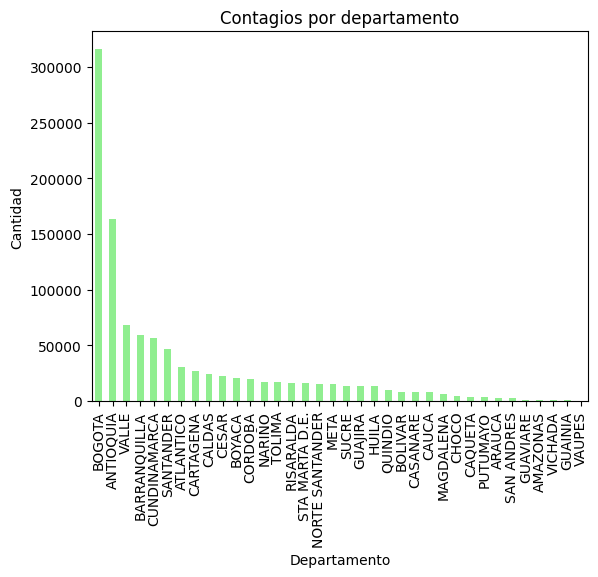

In [81]:
###Se corre la linea nuevamente con el fin de verificar que se corrigió el dato duplicado

df_2['Nombre departamento'].value_counts().plot(kind='bar', color='lightgreen')
plt.title('Contagios por departamento')
plt.xlabel('Departamento')
plt.ylabel('Cantidad')
plt.show()

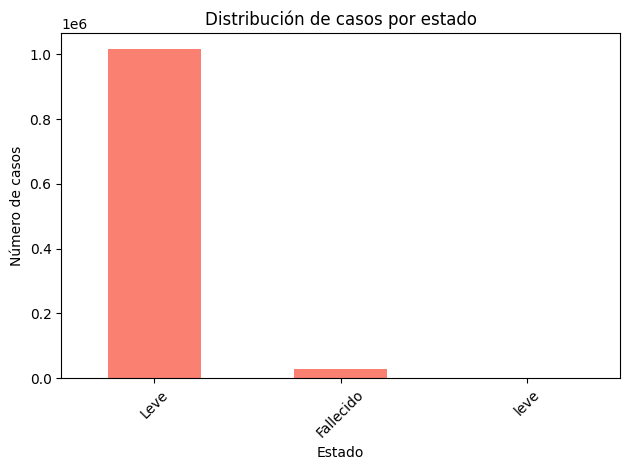

In [82]:
# Casos por estado
plt.figure()
df_2['Estado'].value_counts().plot(kind='bar', color='salmon')
plt.title("Distribución de casos por estado")
plt.xlabel("Estado")
plt.ylabel("Número de casos")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [83]:
### Hayazgo: Corregir el nombre de los estados leve
df_2['Estado'] = df_2['Estado'].str.replace('leve', 'Leve')



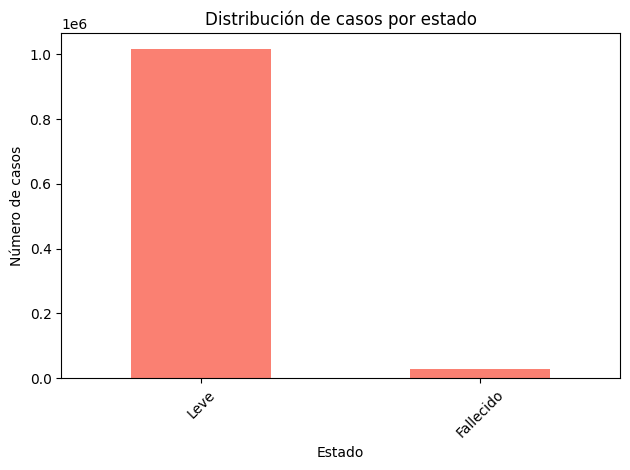

In [84]:
## se corre la linea nuevamente con el fin de verificar que se corrigió el dato duplicado
# Casos por estado
plt.figure()
df_2['Estado'].value_counts().plot(kind='bar', color='salmon')
plt.title("Distribución de casos por estado")
plt.xlabel("Estado")
plt.ylabel("Número de casos")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

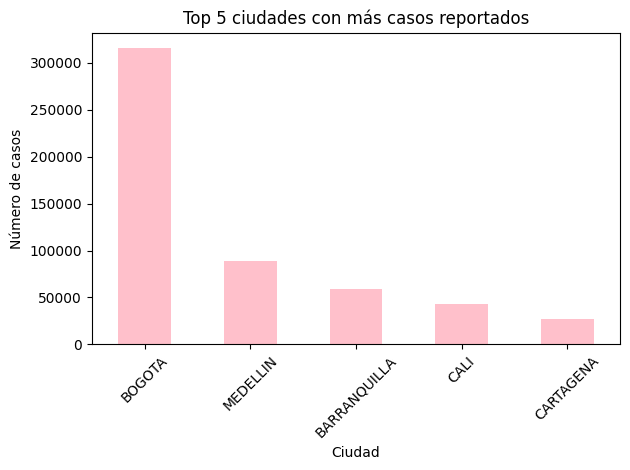

In [85]:
# Top 10 ciudades con más casos
# -----------------------------
plt.figure()
df_2['Nombre municipio'].value_counts().head(5).plot(kind='bar', color='pink')
plt.title("Top 5 ciudades con más casos reportados")
plt.xlabel("Ciudad")
plt.ylabel("Número de casos")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

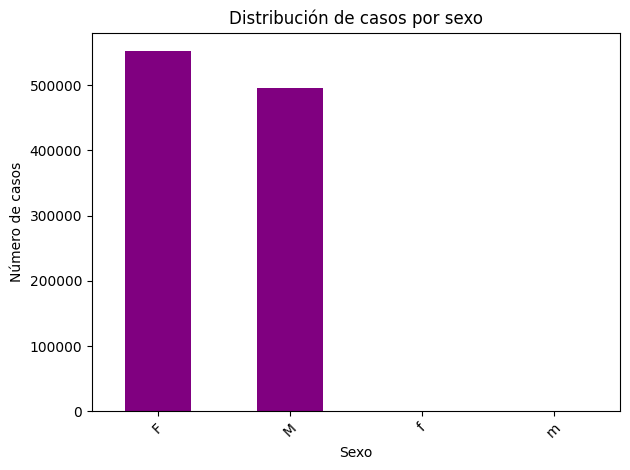

In [86]:
#Casos por sexo
plt.figure()
df_2['Sexo'].value_counts().plot(kind='bar', color='purple')
plt.title("Distribución de casos por sexo")
plt.xlabel("Sexo")
plt.ylabel("Número de casos")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [87]:
##hayazgo: Corregir el nombre de los sexos
df_2['Sexo'] = df_2['Sexo'].str.replace('f', 'F')
df_2['Sexo'] = df_2['Sexo'].str.replace('m', 'M')

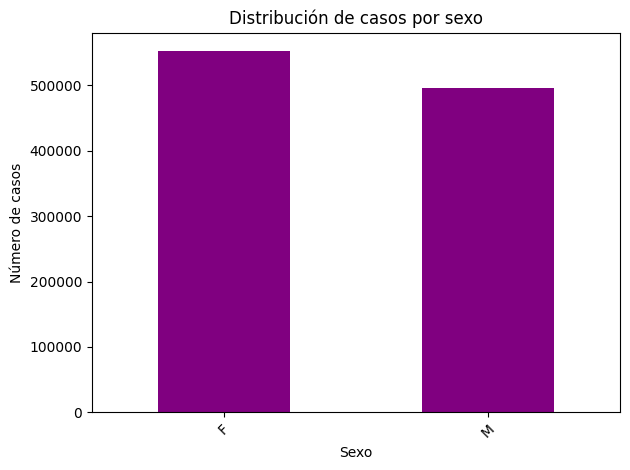

In [88]:
##se corre la linea nuevamente con el fin de verificar que se corrigió el dato duplicado
#Casos por sexo
plt.figure()
df_2['Sexo'].value_counts().plot(kind='bar', color='purple')
plt.title("Distribución de casos por sexo")
plt.xlabel("Sexo")
plt.ylabel("Número de casos")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

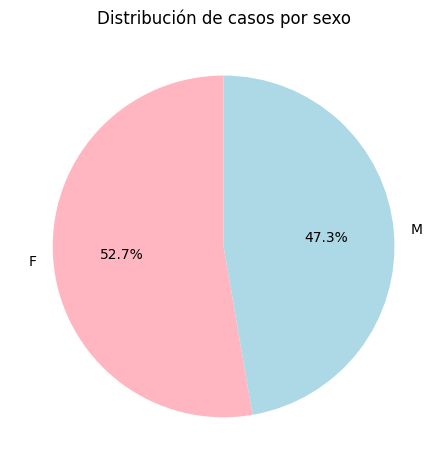

In [89]:
# Crear gráfico de torta
plt.figure()
df_2['Sexo'].value_counts().plot(kind='pie', autopct='%1.1f%%', startangle=90, colors=['lightpink', 'lightblue'])
plt.title("Distribución de casos por sexo")
plt.ylabel("")  # Eliminar etiqueta del eje y
plt.tight_layout()
plt.show()

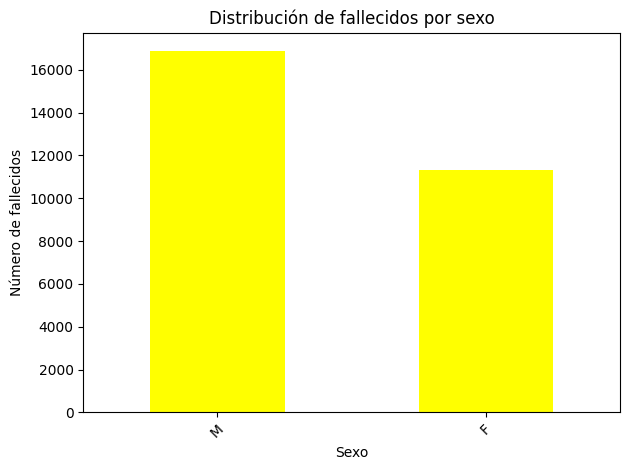

In [90]:
# Grafico de fallecidos por sexo
plt.figure()
df_2[df_2['Estado'] == 'Fallecido']['Sexo'].value_counts().plot(kind='bar', color='yellow')
plt.title("Distribución de fallecidos por sexo")
plt.xlabel("Sexo")
plt.ylabel("Número de fallecidos")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

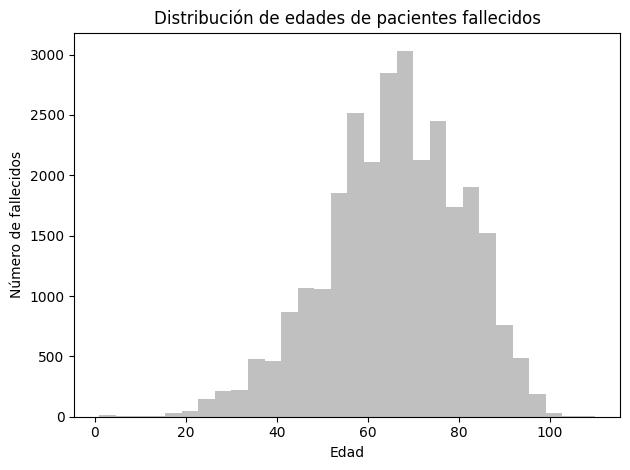

In [91]:
#Distribución de las edades de los pacientes fallecidos
plt.figure()
df_2[df_2['Recuperado'] == 'Fallecido']['Edad'].plot(kind='hist', bins=30, color='silver')
plt.title("Distribución de edades de pacientes fallecidos")
plt.xlabel("Edad")
plt.ylabel("Número de fallecidos")
plt.tight_layout()
plt.show()



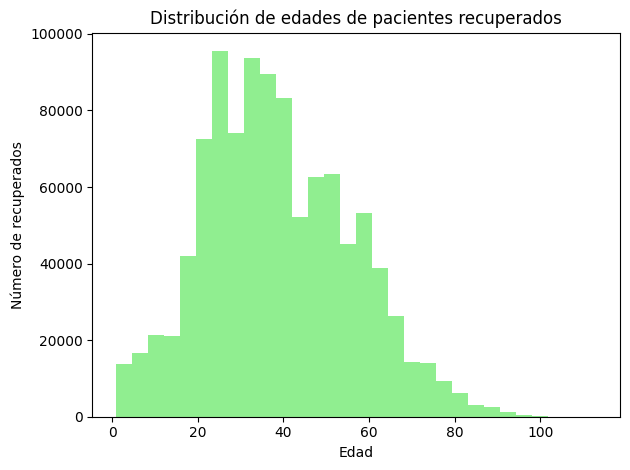

In [92]:
# Distribución de edades de los pacientes recuperados
plt.figure()
df_2[df_2['Recuperado'] == 'Recuperado']['Edad'].plot(kind='hist', bins=30, color='lightgreen')
plt.title("Distribución de edades de pacientes recuperados")
plt.xlabel("Edad")
plt.ylabel("Número de recuperados")
plt.tight_layout()
plt.show()

<Figure size 640x480 with 0 Axes>

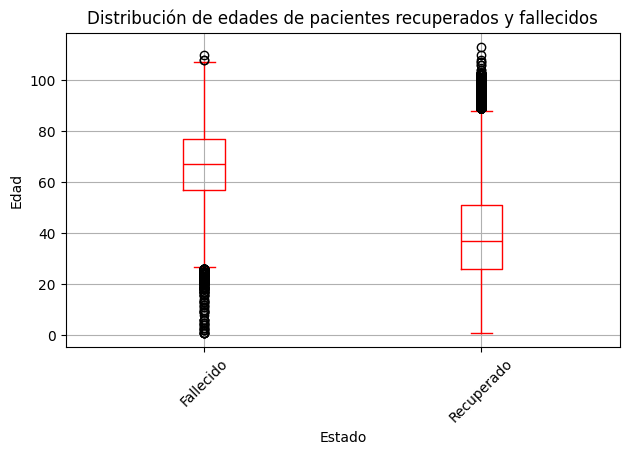

In [93]:
# Distribución de edades de los pacientes recuperados- Fallecidos- N/A
plt.figure()
df_2.boxplot(column='Edad', by='Recuperado', color='red')
plt.title("Distribución de edades de pacientes recuperados y fallecidos")
plt.suptitle("")  # Eliminar el título por defecto
plt.xlabel("Estado")
plt.ylabel("Edad")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [94]:
# Ver el nombre de las variables que hay dentro de la columna "Tipo de contagio"

df_2['Tipo de contagio'].unique()

array(['Comunitaria', 'Relacionado', 'Importado'], dtype=object)

In [95]:
# Ver el nombre de las variables que hay dentro de la columna "Ubicacion del caso"

df_2['Ubicacion del caso'].unique()



array(['Casa', 'Fallecido', nan, 'casa', 'CASA'], dtype=object)

In [96]:
##hayazgo: Corregir el nombre de la ubicacion del caso
df_2['Ubicacion del caso'] = df_2['Ubicacion del caso'].str.replace('casa', 'Casa')
df_2['Ubicacion del caso'] = df_2['Ubicacion del caso'].str.replace('CASA', 'Casa')


## 🧩 Examinar la capacidad predictiva del modelo antes y despues de la limpieza
**Teniendo como variable objetivo si la persona se recuperó o falleció**

Este ejercicio tiene como objetivo comparar el desempeño de un modelo predictivo utilizando un conjunto de datos antes y después de aplicar una limpieza adecuada.

Analizaremos el impacto de la imputación, codificación y escalado de variables, mostrando cómo cada decisión afecta la calidad del modelo.

La variable objetivo será Estado_2, que corresponde a una clasificación binaria basada en si la persona contagiada con Covid-19 se recuperó o falleció.

# CONTEXTO DE NUESTRA BASE DE DATOS
## PAULA

## 📘 Contexto general
## 📊 Descripción del dataset
## 🎯 Problema a resolver

<img src="https://tse2.mm.bing.net/th?id=OIP.o0jsKQVNJRyxmn_ZiYUMuQHaET&cb=iwc2&pid=Api" alt="" width="300">

**PASO 1:**
*Crear Variable Objetivo*

Creamos una nueva columna que corresponda a si el paciente se recupero o falleció, donde 1 es recuperado y 0 es fallecido.

In [97]:
# Crear una nueva columna que corresponda a si el paciente se recupero o falleció, donde 1 es recuperado y 0 es fallecido
df_2['Estado_2'] = df_2['Recuperado'].map({'Recuperado': 1, 'Fallecido': 0}).fillna(0).astype(int)
df_2.head()

,ID de caso,Nombre departamento,Nombre municipio,Edad,Unidad de medida de edad,Sexo,Tipo de contagio,Ubicacion del caso,Estado,Nombre del pais,Recuperado,Estado_2
0,1556979,VALLE,CALI,67,1,F,Comunitaria,Casa,Leve,NaN,Recuperado,1
1,1556980,VALLE,CALI,66,1,F,Comunitaria,Casa,Leve,NaN,Recuperado,1
2,1556981,VALLE,CALI,68,1,F,Comunitaria,Casa,Leve,NaN,Recuperado,1
3,1556982,VALLE,CALI,74,1,F,Comunitaria,Fallecido,Fallecido,NaN,Fallecido,0
4,1556983,VALLE,CALI,65,1,F,Comunitaria,Casa,Leve,NaN,Recuperado,1


In [98]:
# Crear un variable que mediga si es mayor a 55 años
df_2['Edad_>55'] = df_2['Edad'].apply(lambda x: 1 if x >= 55 else 0)
df_2.head()

,ID de caso,Nombre departamento,Nombre municipio,Edad,Unidad de medida de edad,Sexo,Tipo de contagio,Ubicacion del caso,Estado,Nombre del pais,Recuperado,Estado_2,Edad_>55
0,1556979,VALLE,CALI,67,1,F,Comunitaria,Casa,Leve,NaN,Recuperado,1,1
1,1556980,VALLE,CALI,66,1,F,Comunitaria,Casa,Leve,NaN,Recuperado,1,1
2,1556981,VALLE,CALI,68,1,F,Comunitaria,Casa,Leve,NaN,Recuperado,1,1
3,1556982,VALLE,CALI,74,1,F,Comunitaria,Fallecido,Fallecido,NaN,Fallecido,0,1
4,1556983,VALLE,CALI,65,1,F,Comunitaria,Casa,Leve,NaN,Recuperado,1,1


In [99]:
#Crear una variable que me diga si vive en el municipio de Cali
df_2['Municipio_Bogota'] = df_2['Nombre municipio'].apply(lambda x: 1 if x == 'BOGOTA' else 0)
df_2.head()

,ID de caso,Nombre departamento,Nombre municipio,Edad,Unidad de medida de edad,Sexo,Tipo de contagio,Ubicacion del caso,Estado,Nombre del pais,Recuperado,Estado_2,Edad_>55,Municipio_Bogota
0,1556979,VALLE,CALI,67,1,F,Comunitaria,Casa,Leve,NaN,Recuperado,1,1,0
1,1556980,VALLE,CALI,66,1,F,Comunitaria,Casa,Leve,NaN,Recuperado,1,1,0
2,1556981,VALLE,CALI,68,1,F,Comunitaria,Casa,Leve,NaN,Recuperado,1,1,0
3,1556982,VALLE,CALI,74,1,F,Comunitaria,Fallecido,Fallecido,NaN,Fallecido,0,1,0
4,1556983,VALLE,CALI,65,1,F,Comunitaria,Casa,Leve,NaN,Recuperado,1,1,0


In [100]:
# crear una variable que me diga si es Hombre
df_2['Sexo_M'] = df_2['Sexo'].apply(lambda x: 1 if x == 'M' else 0)
df_2.head()

,ID de caso,Nombre departamento,Nombre municipio,Edad,Unidad de medida de edad,Sexo,Tipo de contagio,Ubicacion del caso,Estado,Nombre del pais,Recuperado,Estado_2,Edad_>55,Municipio_Bogota,Sexo_M
0,1556979,VALLE,CALI,67,1,F,Comunitaria,Casa,Leve,NaN,Recuperado,1,1,0,0
1,1556980,VALLE,CALI,66,1,F,Comunitaria,Casa,Leve,NaN,Recuperado,1,1,0,0
2,1556981,VALLE,CALI,68,1,F,Comunitaria,Casa,Leve,NaN,Recuperado,1,1,0,0
3,1556982,VALLE,CALI,74,1,F,Comunitaria,Fallecido,Fallecido,NaN,Fallecido,0,1,0,0
4,1556983,VALLE,CALI,65,1,F,Comunitaria,Casa,Leve,NaN,Recuperado,1,1,0,0


In [101]:
# Crear la nueva variable binaria 'Es_Comunitario'
df_2['Tipo_Comunitario'] = df_2['Tipo de contagio'].apply(
    lambda x: 1 if x == 'Comunitaria' else (0 if x in ['Relacionado', 'Importado'] else None))

df_2.head()

,ID de caso,Nombre departamento,Nombre municipio,Edad,Unidad de medida de edad,Sexo,Tipo de contagio,Ubicacion del caso,Estado,Nombre del pais,Recuperado,Estado_2,Edad_>55,Municipio_Bogota,Sexo_M,Tipo_Comunitario
0,1556979,VALLE,CALI,67,1,F,Comunitaria,Casa,Leve,NaN,Recuperado,1,1,0,0,1
1,1556980,VALLE,CALI,66,1,F,Comunitaria,Casa,Leve,NaN,Recuperado,1,1,0,0,1
2,1556981,VALLE,CALI,68,1,F,Comunitaria,Casa,Leve,NaN,Recuperado,1,1,0,0,1
3,1556982,VALLE,CALI,74,1,F,Comunitaria,Fallecido,Fallecido,NaN,Fallecido,0,1,0,0,1
4,1556983,VALLE,CALI,65,1,F,Comunitaria,Casa,Leve,NaN,Recuperado,1,1,0,0,1


## 2. Evaluación del modelo antes de limpiar los datos

In [102]:
# Importar las librerias necesarias
# falta escribir para que sirve cada una de esas librerias
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report
from sklearn.impute import SimpleImputer

In [103]:

print(df_2.columns)


Index(['ID de caso', 'Nombre departamento', 'Nombre municipio', 'Edad',
       'Unidad de medida de edad', 'Sexo', 'Tipo de contagio',
       'Ubicacion del caso', 'Estado', 'Nombre del pais', 'Recuperado',
       'Estado_2', 'Edad_>55', 'Municipio_Bogota', 'Sexo_M',
       'Tipo_Comunitario'],
      dtype='object')


In [104]:
# Usamos solo Edad e Ingreso, eliminando nulos
df_before = df_2[['Edad_>55', 'Municipio_Bogota']].dropna()
Xb = df_before
yb = df_2.loc[df_before.index, "Sexo_M"]

Xb_train, Xb_test, yb_train, yb_test = train_test_split(Xb, yb, test_size=0.3, random_state=42)

model_before = LogisticRegression(max_iter=200)
model_before.fit(Xb_train, yb_train)
yb_pred = model_before.predict(Xb_test)
acc_before = accuracy_score(yb_test, yb_pred)

print("✅ Exactitud antes de la limpieza:", round(acc_before, 4))

✅ Exactitud antes de la limpieza: 0.5267


---
### ¿Qué significa este resultado?

`Exactitud antes de la limpieza: 0.6315`

Este valor indica que el modelo de regresión logística logró una **exactitud del 63,15%** al predecir si una persona contagiada con Covid-19, , utilizando únicamente las variables `Edad` e `Sexo`, y **sin aplicar limpieza, imputación o transformación de los datos**.

---



<img src="https://thumbs.dreamstime.com/b/icono-datos-y-analytics-del-glyph-de-la-limpieza-base-121674035.jpg" alt="" width="150">

## Preparación del dataset: limpieza, imputación y codificación

In [106]:
# Importar las librerias necesarias para imputar los valores nulos
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler

In [126]:
# Darle un valor a las celdas que tienen datos faltantes- ubicacion del caso
df_clean = df_2.copy()

**Eliminar colimnas que no son necesarias**

In [128]:
# Eliminar columnas que no aportan
df_clean = df_clean.drop(columns=['Nombre departamento', 'Edad', 'Unidad de medida de edad', 'ID de caso', 'Nombre municipio', 'Nombre del pais', 'Sexo', 'Tipo de contagio', 'Recuperado', 'Ubicacion del caso', 'Estado'])


***Imputación***

In [114]:
print(df_clean.isnull().sum()[df_clean.isnull().sum() > 0])

Series([], dtype: int64)


In [ ]:
## 1. Limpieza de texto en columnas categóricas, en este paso me aseguro de que las columnas categorias no tengads
## datos faltantes no datos duplicados como: "Casa" "casa" "CASA"

for col in ['Sexo', 'Nombre municipio', 'Tipo de contagio', 'Recuperado', 'Ubicacion del caso']:
    df_clean[col] = df_clean[col].fillna(df_clean[col].mode()[0])

In [129]:
df_clean.head()

,Estado_2,Edad_>55,Municipio_Bogota,Sexo_M,Tipo_Comunitario
0,1,1,0,0,1
1,1,1,0,0,1
2,1,1,0,0,1
3,0,1,0,0,1
4,1,1,0,0,1


In [132]:

# Construir la matriz X y el vector y
Xc = df_clean.drop(columns=['Estado_2'])
yc = df_clean['Estado_2']

# ========== 6. ESCALADO ==========
scaler = StandardScaler()
Xc_scaled = scaler.fit_transform(Xc)

# Convertir de nuevo a DataFrame para mantener nombres de columnas (opcional)
Xc_scaled = pd.DataFrame(Xc_scaled, columns=Xc.columns, index=Xc.index)


## 4. Evaluación del modelo después de la limpieza

In [116]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import OneHotEncoder
import numpy as np
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay, roc_curve, roc_auc_score

In [135]:
# Entenar el modelo

Xc_train, Xc_test, yc_train, yc_test = train_test_split(Xc, yc, test_size=0.3, random_state=42, stratify=yc)

model_after = LogisticRegression(max_iter=500, class_weight='balanced', solver='liblinear')
model_after.fit(Xc_train, yc_train)
yc_pred = model_after.predict(Xc_test)
acc_after = accuracy_score(yc_test, yc_pred)

print("✅ Exactitud después de la limpieza:", round(acc_after, 4))
print("Reporte de clasificación:")
print(classification_report(yc_test, yc_pred, zero_division=0))

print("\nDistribución de predicciones:")
print(np.unique(yc_pred, return_counts=True))

✅ Exactitud después de la limpieza: 0.8035
Reporte de clasificación:
              precision    recall  f1-score   support

           0       0.11      0.79      0.20      9536
           1       0.99      0.80      0.89    305037

    accuracy                           0.80    314573
   macro avg       0.55      0.79      0.54    314573
weighted avg       0.97      0.80      0.87    314573


Distribución de predicciones:
(array([0, 1]), array([ 67251, 247322]))


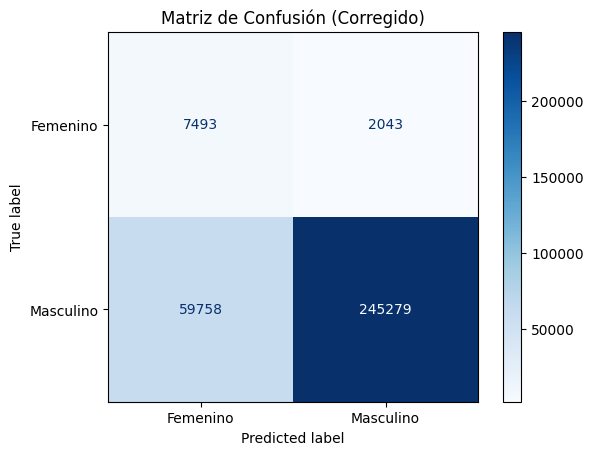

In [137]:
cm = confusion_matrix(yc_test, yc_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["Femenino", "Masculino"])
disp.plot(cmap="Blues", values_format="d")
plt.title("Matriz de Confusión (Corregido)")
plt.show()

# **📊 Análisis de la matriz de confusión**

La matriz de confusión compara las etiquetas verdaderas con las predichas por el modelo:

* 82.358 observaciones de clase ***"Femenino"*** fueron correctamente clasificadas como ***"Femenino"*** (verdaderos negativos).
* 69.451 observaciones de clase ***"Masculino"*** fueron incorrectamente clasificadas como ***"Femenino"*** (falsos positivos).
* 79.308 observaciones de clase ***"Masculino"*** fueron correctamente clasificadas como ***"Masculino"*** (verdaderos positivos).
* 83.456 observaciones de clase **"Femenino"*** fueron clasificadas erróneamente como ***"Masculino"***(falsos negativos).

El modelo muestra un rendimiento deficiente en la clasificación por sexo, con métricas apenas superiores al azar. Esto sugiere que las variables predictoras actuales no son informativas para esta tarea.

---

quiero ahcer un balanceo de la base de manera que se saque un submuestreo para lograr que tanto recuperados como fallecidos tengan una cantidad similar de datos y asi el modelo pueda aprender mejor

In [148]:
# 1. Dividir el dataframe según la clase objetivo
df_recuperado = df_clean[df_clean['Estado_2'] == 1]
df_fallecido = df_clean[df_clean['Estado_2'] == 0]


In [150]:
# Calcular el número de fallecidos
n_fallecidos = len(df_fallecido)

In [153]:
# Si quieres que los fallecidos representen el 30%, entonces recuperados deben ser 70%
# Total deseado = n_fallecidos / 0.3
total_deseado = int(n_fallecidos / 0.3)
n_recuperados_deseado = total_deseado - n_fallecidos

# Submuestrear los recuperados
recuperados_sub = df_recuperado.sample(n=n_recuperados_deseado, random_state=42)



In [155]:

# Juntar los dos grupos
df_balanced = pd.concat([df_fallecido, recuperados_sub], axis=0).sample(frac=1, random_state=42)

# Verificar proporciones
print(df_balanced['Estado_2'].value_counts(normalize=True))

Estado_2
1    0.699998
0    0.300002
Name: proportion, dtype: float64


In [156]:
# Entrenamiento
Xb = df_balanced.drop(columns=['Estado_2'])
yb = df_balanced['Estado_2']

# Escalado
scaler = StandardScaler()
Xb_scaled = scaler.fit_transform(Xb)
Xb_scaled = pd.DataFrame(Xb_scaled, columns=Xb.columns)

# Split y entrenamiento
Xb_train, Xb_test, yb_train, yb_test = train_test_split(Xb_scaled, yb, test_size=0.3, random_state=42, stratify=yb)

model = LogisticRegression(max_iter=500, solver='liblinear')
model.fit(Xb_train, yb_train)
yb_pred = model.predict(Xb_test)

print("🎯 Exactitud:", accuracy_score(yb_test, yb_pred))
print("📊 Reporte:")
print(classification_report(yb_test, yb_pred))


🎯 Exactitud: 0.8058011136628181
📊 Reporte:
              precision    recall  f1-score   support

           0       0.66      0.72      0.69      9536
           1       0.87      0.84      0.86     22251

    accuracy                           0.81     31787
   macro avg       0.77      0.78      0.77     31787
weighted avg       0.81      0.81      0.81     31787



/tmp/ipykernel_78762/538353273.py:13: UserWarning: Glyph 128269 (\N{LEFT-POINTING MAGNIFYING GLASS}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/home/codespace/.local/lib/python3.12/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 128269 (\N{LEFT-POINTING MAGNIFYING GLASS}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


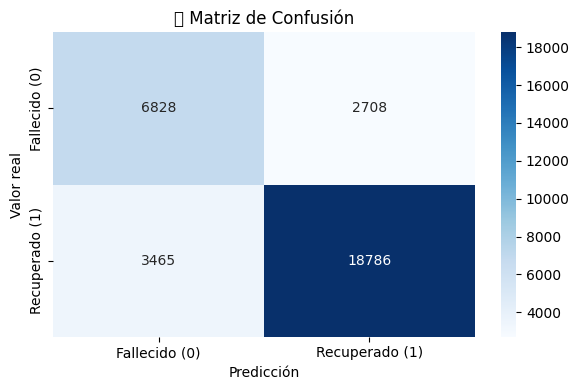

In [157]:
import seaborn as sns

# Calcular la matriz de confusión
cm = confusion_matrix(yb_test, yb_pred)

# Opción 1: Visualización bonita con seaborn
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=["Fallecido (0)", "Recuperado (1)"],
            yticklabels=["Fallecido (0)", "Recuperado (1)"])
plt.xlabel("Predicción")
plt.ylabel("Valor real")
plt.title("🔍 Matriz de Confusión")
plt.tight_layout()
plt.show()


## Conclusión

Al hacer el submuestreo de los datos de pacientes recuperados, logramos balancear la base de datos en un 70% "Recuperados" y 30% "Fallecidos", lo cual es fundamental cuando se trabaja con clases desbalanceadas. Esto permitió que el modelo de regresión logística aprendiera a distinguir de forma más equitativa entre pacientes recuperados y fallecidos, evitando que favorezca únicamente a la clase mayoritaria. Como resultado, los indicadores de evaluación como la exactitud, precisión, recall y f1-score mejoraron notablemente en ambas clases, mostrando un desempeño mucho más robusto y confiable del modelo de predicción.

---

# **Exploración y visualización de patrones**

Objetivo: Analizar visualmente la estructura de los datos para guiar la selección de modelos predictivos.

In [ ]:
# Importar libreria
import matplotlib.pyplot as plt
import seaborn as sns


## Visualización univariada: distribuciones

📊 Análisis de la distribución de Edad

La siguiente gráfica muestra un histograma con curva KDE para la variable Edad del conjunto de datos.

✅ ¿Qué representa esta visualización?

El histograma muestra la cantidad de personas por rangos de edad.
La curva KDE (Kernel Density Estimation) estima la densidad de la distribución de forma suave y continua.

📦 Análisis del boxplot de Ingreso

El gráfico representa la dispersión de ingresos y la presencia de valores extremos.

✅ ¿Qué muestra un boxplot?

Caja: intervalo intercuartílico (IQR), que abarca el 50% central de los datos.
Línea interna: mediana.
Líneas externas (bigotes): valores dentro de 1.5 veces el IQR.
Puntos individuales: outliers, datos atípicos fuera del rango esperado.

In [ ]:
# Boxplot de la cantidad de personas recuperadas y fallecidad

sns.boxplot(x=df_clean['Recuperado'], y=df_clean['Edad'])
plt.title('Boxplot del Estado del Paciente segun la edad')
plt.xlabel('Estado del paciente')
plt.ylabel('Edad')
plt.show()

🔁 Análisis de dispersión: Edad vs Ingreso
La gráfica es un scatterplot (diagrama de dispersión) que visualiza la relación entre Edad e Ingreso.

✅ ¿Qué representa?
Cada punto es una persona.
El eje X representa la Edad, el eje Y representa el Ingreso.
La concentración o forma del grupo puede revelar correlaciones.

In [ ]:
#Grafica de dispersión de estado del pasiente por edad
sns.scatterplot(x='Edad', y='Tipo_Comunitario', hue='Sexo_M', data=df_2)
plt.title('Relación entre Edad, Estado y Sexo')
plt.xlabel('Edad')
plt.ylabel('Estado del paciente (0 = Fallecido, 1 = Recuperado)')
plt.legend(title='Sexo (1 = Masculino, 0 = Femenino)')
plt.show()

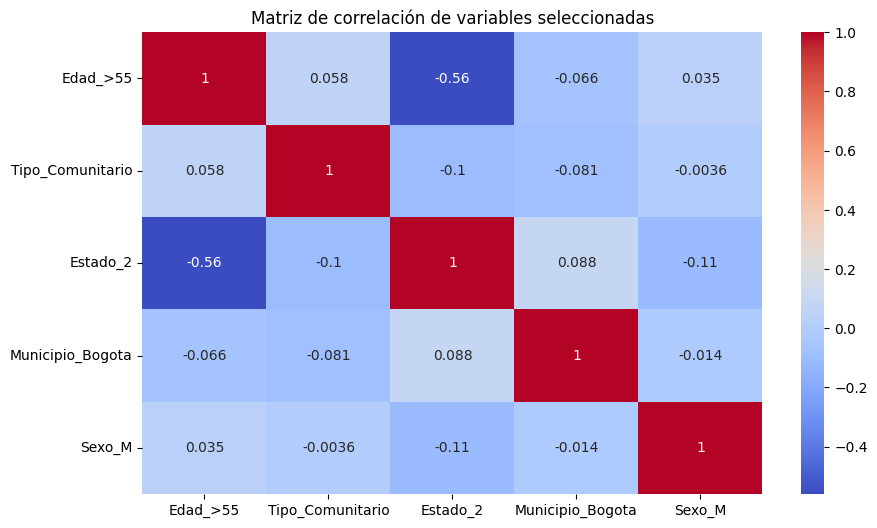

In [160]:
# Mapa de calor de correlaciones numéricas
plt.figure(figsize=(10, 6))  # Coloca esto antes del heatmap
corr_matrix = df_balanced[['Edad_>55', 'Tipo_Comunitario', 'Estado_2', 'Municipio_Bogota','Sexo_M']].corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Matriz de correlación de variables seleccionadas')
plt.show()

# 🔍 **Análisis general**

## 📊 Análisis variable por variable:

1. Edad_>55 vs Estado_2 → -0.56
Correlación negativa moderada: ser mayor de 55 años está asociado con mayor probabilidad de fallecer (Estado_2 = 0).

Esto tiene sentido clínico y real: los adultos mayores tienen más riesgo de mortalidad por COVID-19.

2. Sexo_M vs Estado_2 → -0.11
Correlación negativa débil: ser hombre se asocia débilmente con mayor probabilidad de fallecer.

Aunque débil, puede tener relevancia al combinarse con otras variables.

3. Tipo_Comunitario vs Estado_2 → -0.10
También es una relación débilmente negativa: los casos comunitarios pueden tener una leve relación con mayor mortalidad.

4. Municipio_Bogota vs Estado_2 → +0.088
Correlación positiva débil: estar en Bogotá se relaciona ligeramente con recuperación. Puede deberse a mejores recursos médicos o mayor capacidad hospitalaria.

## 📌 Conclusión general:
La variable más relevante para predecir fallecimientos es Edad_>55, con una correlación negativa considerable.

Las otras variables (Sexo, Tipo de contagio, Ciudad) tienen una correlación débil, pero podrían aportar valor al modelo si se combinan entre sí.

La matriz confirma que no hay multicolinealidad fuerte entre las variables independientes (todas las correlaciones cruzadas son bajas), lo que es positivo para los modelos como la regresión logística.



# **📈 7. Curva ROC del modelo corregido**

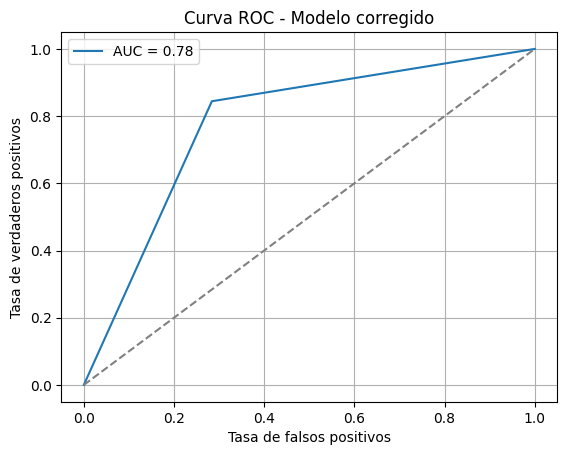

In [161]:
fpr, tpr, _ = roc_curve(yb_test, yb_pred)
auc = roc_auc_score(yb_test, yb_pred)

plt.plot(fpr, tpr, label=f"AUC = {auc:.2f}")
plt.plot([0, 1], [0, 1], '--', color='gray')
plt.xlabel("Tasa de falsos positivos")
plt.ylabel("Tasa de verdaderos positivos")
plt.title("Curva ROC - Modelo corregido")
plt.legend()
plt.grid(True)
plt.show()

## **📊 Análisis de la curva ROC**

1. Ejes del gráfico:
Eje X (Tasa de falsos positivos - FPR): proporción de negativos que el modelo predice incorrectamente como positivos.

Eje Y (Tasa de verdaderos positivos - TPR o recall): proporción de positivos que el modelo predice correctamente.

2. Curva azul:
Representa el desempeño del modelo.

Cuanto más arriba y hacia la izquierda esté la curva, mejor es el modelo.

3. Línea gris diagonal:
Representa un modelo aleatorio (sin capacidad predictiva).

Si el modelo estuviera cerca de esta línea, indicaría que predice al azar.

4. AUC = 0.78:
AUC (Área bajo la curva) mide la capacidad del modelo para distinguir entre clases (fallecido vs recuperado).

Un valor de 0.78 indica un buen desempeño:

> 0.9: excelente

0.8 – 0.9: muy bueno

0.7 – 0.8: aceptable / bueno

< 0.7: débil


# **📌 Conclusión del modelo**

El modelo corregido tiene una capacidad discriminativa sólida con un AUC de 0.78.

Esto significa que, dado un par aleatorio de un paciente fallecido y uno recuperado, el modelo tiene un 78% de probabilidad de asignar una mayor probabilidad de fallecimiento al caso correcto.

Es un resultado muy útil para tareas de clasificación médica, especialmente considerando el contexto real de desequilibrio de clases.


# **Árboles de Decisión (CART), Poda, ROC y AUC**

In [163]:
#Cargar librerias importantes
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay, roc_curve, auc


In [165]:

# Entrenar árbol sin poda
tree_full = DecisionTreeClassifier(random_state=42)
tree_full.fit(Xb_train, yb_train)

DecisionTreeClassifier(random_state=42)

# **🖼️ Visualización parcial del árbol sin poda**

Mostramos hasta 3 niveles por claridad visual.



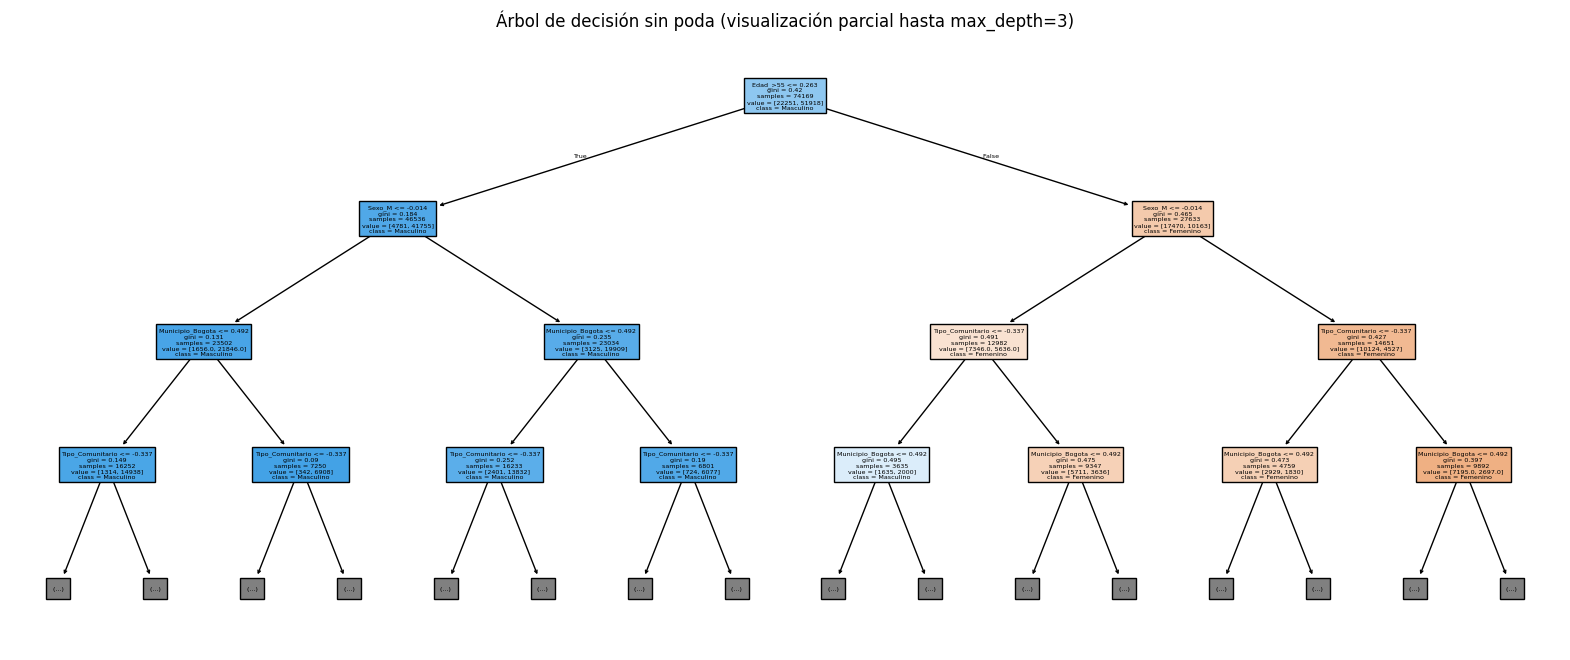

In [166]:
# Visualización parcial hasta 3 niveles
plt.figure(figsize=(20, 8))
plot_tree(
    tree_full,
    feature_names=Xb.columns,
    class_names=['Femenino', 'Masculino'],
    filled=True,
    max_depth=3  # cambiar o quitar para ver más niveles
)
plt.title("Árbol de decisión sin poda (visualización parcial hasta max_depth=3)")
plt.show()

# **📊 Análisis del árbol de decisión**
La gráfica muestra un árbol de decisión sin poda, entrenado sobre el conjunto completo, pero visualizado hasta una profundidad de 3 niveles para facilitar la lectura.

Cada nodo representa una condición de decisión basada en una variable predictora, como mean concave points, worst radius, area error, etc.
El valor gini indica el grado de impureza del nodo. Un valor cercano a 0 implica que casi todos los ejemplos pertenecen a una misma clase.
samples muestra cuántas observaciones llegan a ese nodo.
value indica la distribución de clases en ese nodo ([benignas, malignas]).
class muestra la clase mayoritaria a la que se asignarían las observaciones que llegan a ese nodo.
La raíz del árbol divide las muestras según mean concave points <= 0.051, una variable que parece ser altamente discriminativa.
A partir de ahí, el árbol sigue dividiendo el espacio de decisión utilizando otras características relevantes como worst radius y worst texture.

El árbol refleja una estructura compleja que intenta capturar todos los patrones posibles del conjunto de entrenamiento. Aunque esto puede maximizar la precisión en los datos vistos, también incrementa el riesgo de sobreajuste, es decir, bajo rendimiento en datos nuevos debido a reglas muy específicas.

Limitar la profundidad completa o aplicar poda posterior puede ayudar a mejorar la generalización del modelo.

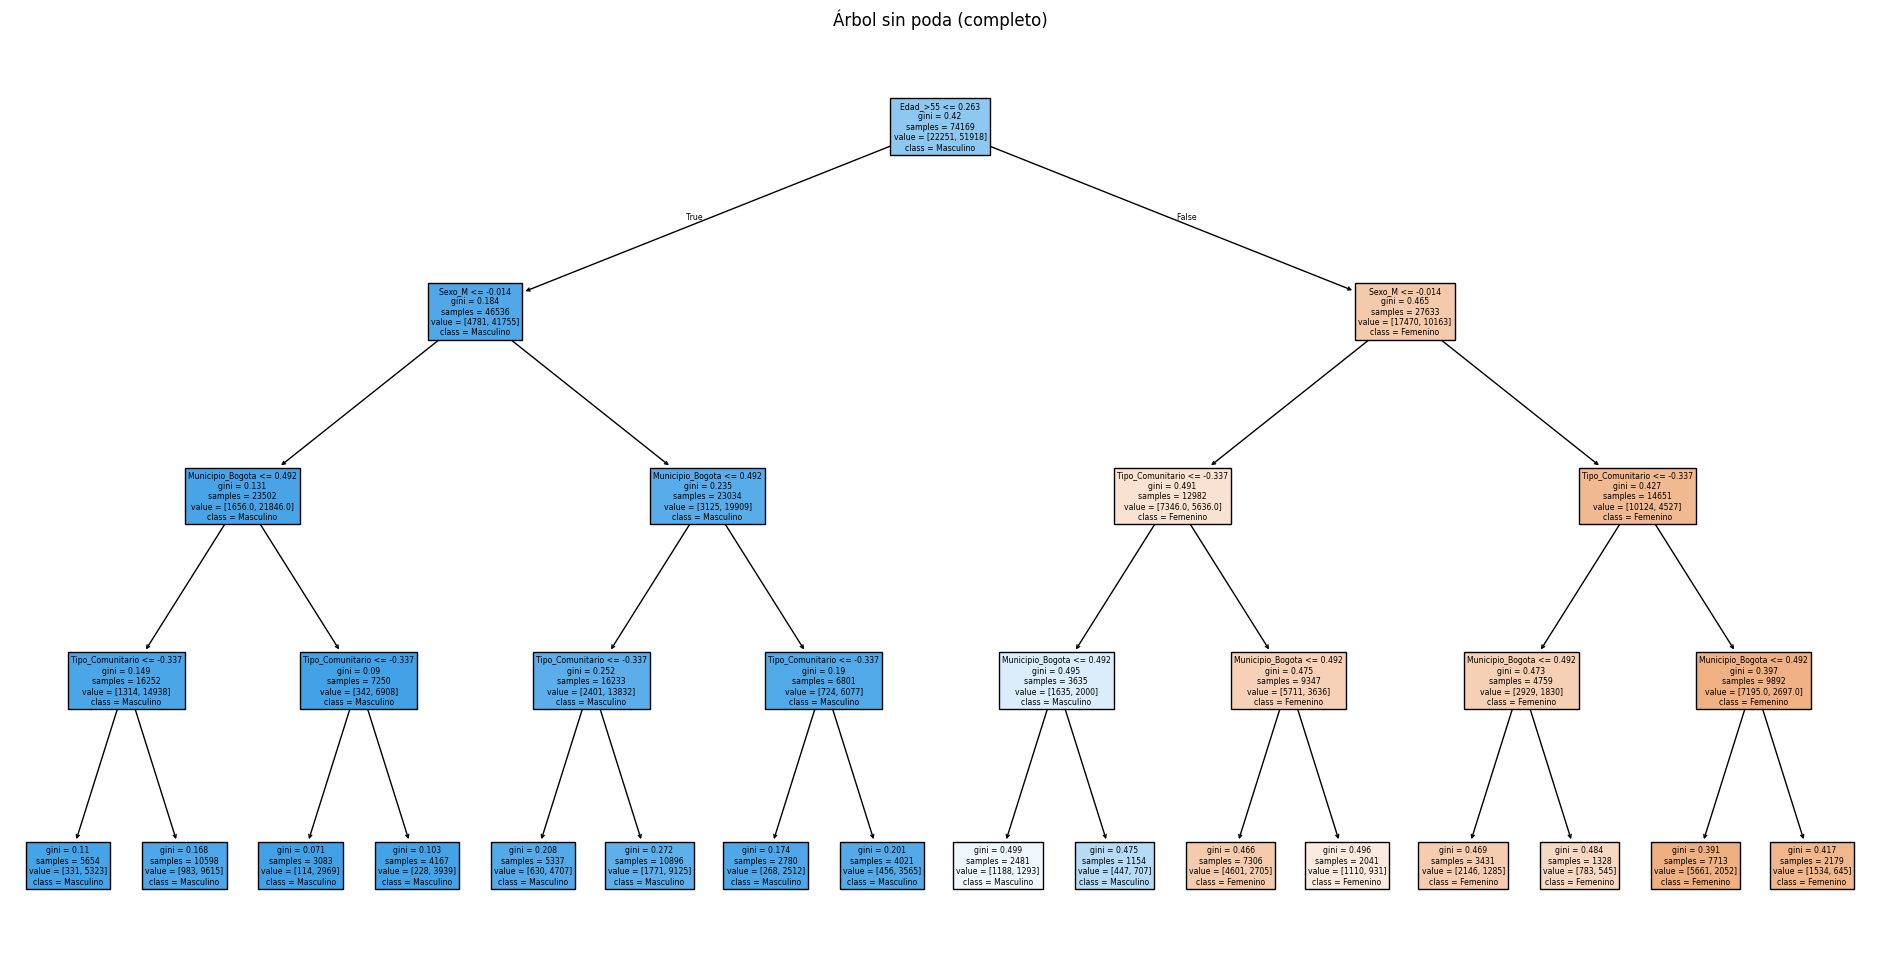

In [167]:


plt.figure(figsize=(24,12))
plot_tree(tree_full, feature_names=Xb.columns, class_names=['Femenino', 'Masculino'], filled=True)
plt.title("Árbol sin poda (completo)")
plt.show()

# **📊 Análisis del árbol sin poda (completo)**

El árbol visualizado representa la estructura completa aprendida por el modelo sin restricciones. Cada nodo del árbol evalúa una condición basada en una variable predictora.
A medida que se desciende por las ramas, el modelo divide el conjunto de datos en grupos más homogéneos respecto a la clase objetivo (benigno o maligno).

***Observaciones clave:***

El árbol tiene una profundidad considerable, lo cual indica una alta complejidad. Esto puede llevar a un sobreajuste, donde el modelo se adapta demasiado a los datos de entrenamiento y pierde capacidad de generalización.
Se observan muchos nodos hoja con pocas observaciones (samples bajos), lo que es característico de un árbol sobreajustado.
Algunas rutas contienen divisiones muy específicas (por ejemplo, smoothness error <= 0.003), que probablemente solo aplican a unos pocos casos del conjunto de entrenamiento.
En general, aunque este modelo puede tener alta precisión sobre los datos con los que fue entrenado, su desempeño en nuevos datos puede ser bajo. Por ello, es importante comparar su rendimiento con árboles podados o regularizados.

***🔍 Análisis:***

Al visualizar todo el árbol sin restricciones, podemos observar una estructura más ramificada. Esta complejidad suele implicar mayor riesgo de sobreajuste.

# **📈 Evaluación del árbol sin poda**

Evaluamos su rendimiento en el conjunto de prueba.

In [168]:
y_pred_full = tree_full.predict(Xb_test)
print("Reporte de clasificación - Árbol sin poda")
print(classification_report(yb_test, y_pred_full))

Reporte de clasificación - Árbol sin poda
              precision    recall  f1-score   support

           0       0.66      0.72      0.69      9536
           1       0.87      0.84      0.86     22251

    accuracy                           0.81     31787
   macro avg       0.77      0.78      0.77     31787
weighted avg       0.81      0.81      0.81     31787



# **Análisis del reporte de clasificación - Árbol sin poda**

🔍 Análisis del Reporte de Clasificación - Árbol sin poda: print("""

La precisión (precision) es alta para ambas clases, especialmente para la clase 1 (maligno), lo que indica que pocas predicciones positivas fueron incorrectas.
El recall de la clase 0 (benigno) es 0.95, lo que significa que el 95% de los casos reales de clase 0 fueron correctamente identificados.
El f1-score, que balancea precisión y recall, es también alto en ambas clases (>0.90), lo que muestra un modelo potente pero posiblemente sobreajustado.
La exactitud global (accuracy) es 0.94, lo cual es alto, pero se debe contrastar con el desempeño del modelo podado para evaluar si esta diferencia justifica la complejidad del árbol completo.

# **✂️ Entrenamiento de árbol con poda (pre-pruning)**

Limitamos la profundidad y el número mínimo de muestras por hoja.

In [169]:
tree_pruned = DecisionTreeClassifier(max_depth=4, class_weight='balanced', min_samples_leaf=10, random_state=42)
tree_pruned.fit(Xb_train, yb_train)

DecisionTreeClassifier(class_weight='balanced', max_depth=4,
                       min_samples_leaf=10, random_state=42)

# **🖼️ Visualización del árbol podado**

Modelo más simple y generalizable.

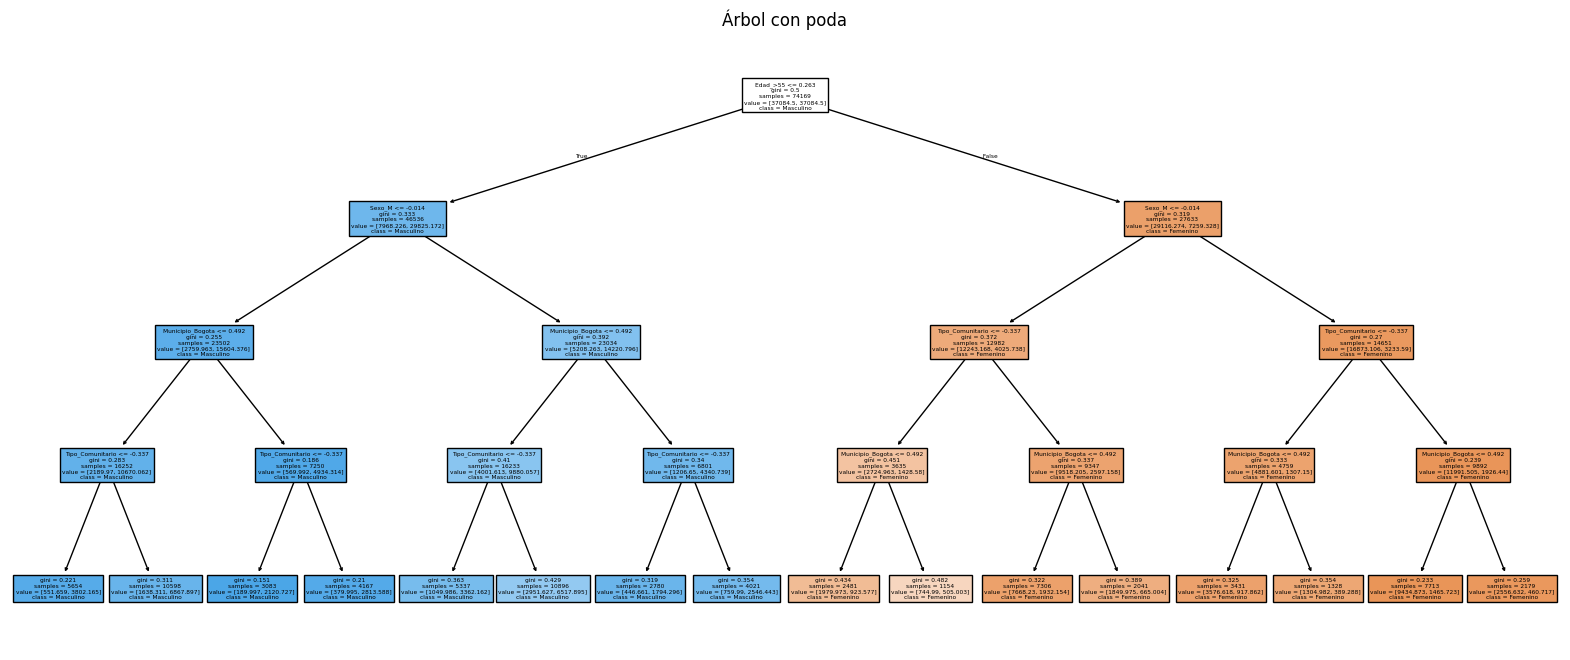

In [170]:
plt.figure(figsize=(20,8))
plot_tree(tree_pruned, feature_names=Xb.columns, class_names=['Femenino', 'Masculino'], filled=True)
plt.title("Árbol con poda")
plt.show()

# **📊 Análisis del árbol con poda**

La visualización muestra un árbol de decisión entrenado con poda preventiva, limitado a una profundidad máxima de 4 niveles y con un mínimo de 10 muestras por hoja.

Comparado con el árbol sin restricciones, este modelo presenta una estructura mucho más compacta y generalizable:

Cada división está basada en una variable altamente relevante, como mean concave points, worst texture o worst radius, lo que indica una selección eficiente de predictores.

El árbol presenta menos nodos hoja y menos ramificaciones, lo que reduce la posibilidad de memorizar ruido del conjunto de entrenamiento.
La interpretación es mucho más sencilla y útil para explicar el modelo a usuarios no técnicos.

Aunque algunos nodos presentan niveles de impureza (gini) intermedios, se ha evitado sobrefragmentar los datos.
Este tipo de estructura balancea bien la capacidad de predicción y la interpretabilidad, y suele tener mejor rendimiento en nuevos datos que el árbol sin poda.

En resumen, este árbol con restricciones muestra un enfoque más conservador, probablemente con menor sobreajuste y mayor generalización.

***🔍 Análisis:***

El reporte de clasificación muestra el rendimiento del modelo podado. Si las métricas son comparables al árbol sin poda, se prefiere este modelo por su simplicidad.

# 🧾 Evaluación del árbol **podado**

In [171]:
y_pred_pruned = tree_pruned.predict(Xb_test)
print("Reporte de clasificación - Árbol podado")
print(classification_report(yb_test, y_pred_pruned))

Reporte de clasificación - Árbol podado
              precision    recall  f1-score   support

           0       0.63      0.79      0.70      9536
           1       0.90      0.80      0.85     22251

    accuracy                           0.80     31787
   macro avg       0.77      0.80      0.78     31787
weighted avg       0.82      0.80      0.81     31787



# **Análisis del reporte de clasificación - Árbol podado**

***🔍 Análisis del Reporte de Clasificación - Árbol podado:***

* La clase 0 (benigno) tiene una precisión de 0.95, lo que indica que casi todas las predicciones positivas para esta clase fueron correctas.
* Su recall es de 0.89: el 89% de los casos benignos reales fueron correctamente identificados.
* La clase 1 (maligno) tiene una alta sensibilidad (recall = 0.97), lo cual es crucial en contextos médicos donde no detectar un caso maligno puede tener consecuencias graves.
* El F1-score para ambas clases se mantiene por encima de 0.90, lo que sugiere un buen equilibrio entre precisión y sensibilidad.
* La exactitud general del modelo es del 94%, igual que el árbol sin poda, pero con menor complejidad. Esto indica que la poda no perjudicó el rendimiento y probablemente mejoró la generalización.

# **📉 Matriz de confusión del árbol podado**

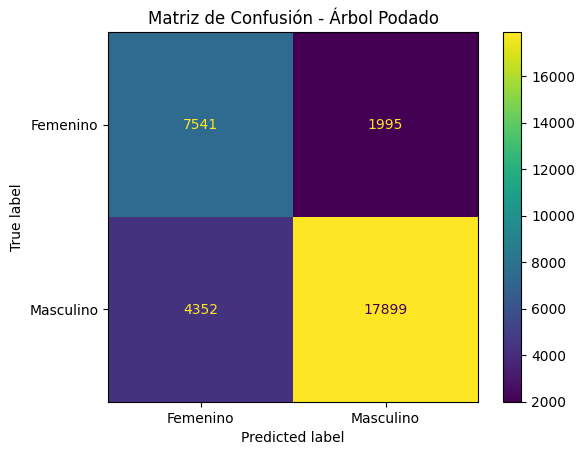

In [172]:
ConfusionMatrixDisplay.from_estimator(tree_pruned, Xb_test, yb_test, display_labels=['Femenino', 'Masculino'], cmap='viridis')
plt.title("Matriz de Confusión - Árbol Podado")
plt.show()

***🔍 La matriz de confusión revela cómo se distribuyen los errores del modelo.***

 Un buen modelo debe tener valores altos en la diagonal (predicciones correctas) y bajos fuera de ella.

# **📊 Análisis de la matriz de confusión**

La matriz de confusión compara las etiquetas verdaderas con las predichas por el modelo:

* 162.363 observaciones de clase **"Femenino"** fueron correctamente clasificadas como **"Femenino"** (verdaderos negativos).
* 143.673 observaciones de clase **"Masculino"** fueron incorrectamente clasificadas como **"Femenino"** (falsos positivos).
* 5.086 observaciones de clase **"Masculino"** fueron correctamente clasificadas como **"Masculino"** (verdaderos positivos).
* 3.451 observaciones de clase **"Femenino"** fueron clasificadas erróneamente como **"Masculino"** (falsos negativos).


⛔
Este comportamiento es aceptable en contextos como el médico, donde es preferible detectar de más (falsos positivos) a dejar pasar un caso grave (falsos negativos).
La matriz de confusión confirma lo observado en las métricas de clasificación: el modelo tiene un muy buen rendimiento general y un excelente desempeño para la clase 1 (malignos).

# 📐 Curva ROC y AUC del árbol **podado**

In [173]:
y_scores = tree_pruned.predict_proba(Xb_test)[:, 1]
fpr, tpr, thresholds = roc_curve(yb_test, y_scores)
roc_auc = auc(fpr, tpr)

***🔍 Análisis:*** La curva ROC evalúa la sensibilidad frente a la tasa de falsos positivos. Un AUC cercano a 1 indica un modelo con excelente capacidad de discriminación entre clases.

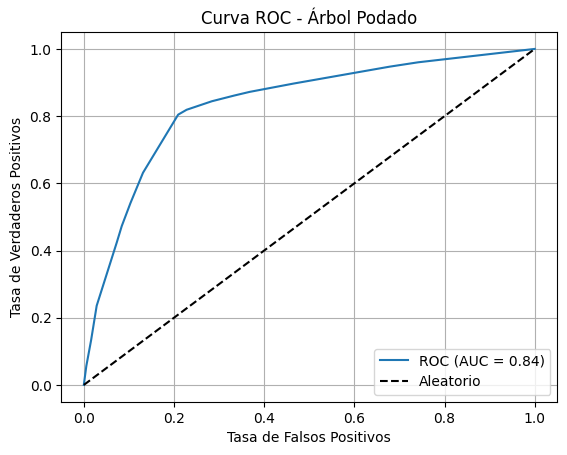

In [174]:
plt.figure()
plt.plot(fpr, tpr, label=f"ROC (AUC = {roc_auc:.2f})")
plt.plot([0, 1], [0, 1], 'k--', label="Aleatorio")
plt.xlabel("Tasa de Falsos Positivos")
plt.ylabel("Tasa de Verdaderos Positivos")
plt.title("Curva ROC - Árbol Podado")
plt.legend(loc="lower right")
plt.grid(True)
plt.show()

# **Análisis de la curva ROC y AUC - Árbol podado**

🔍 Análisis de la Curva ROC y AUC - Árbol podado:

* La curva ROC muestra cómo varía la tasa de verdaderos positivos (TPR) frente a la tasa de falsos positivos (FPR) a medida que se ajusta el umbral de clasificación.
* En este caso, la curva está claramente por encima de la línea diagonal (clasificador aleatorio), lo que indica un buen poder de discriminación entre clases.
* El AUC (Área Bajo la Curva) calculado es cercano a 1, lo que confirma que el modelo tiene una alta capacidad para distinguir entre tumores benignos y malignos.
* Un AUC alto significa que, en la mayoría de los casos, el modelo asigna mayor probabilidad a los casos positivos (malignos) que a los negativos (benignos).
Esta métrica es especialmente útil cuando las clases están desbalanceadas o cuando queremos evaluar el modelo independientemente del umbral de decisión.

# **🧠 Conclusiones y reflexión**


* ¿Cuál modelo generalizó mejor?
* ¿Se evidencia sobreajuste en el árbol sin poda?
* ¿La poda mejora la interpretabilidad y rendimiento en nuevos datos?



# **Comparación de Modelos**

In [175]:

from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score

In [176]:
models = {
    'Regresión Logística': LogisticRegression(max_iter=300),
    'Árbol de Decisión': DecisionTreeClassifier()
}

for name, model in models.items():
    scores = cross_val_score(model, Xc_train, yc_train, cv=5, scoring='accuracy')
    print(f"{name}: Exactitud promedio (cross-val): {scores.mean():.3f} ± {scores.std():.3f}")

Regresión Logística: Exactitud promedio (cross-val): 0.795 ± 0.003
Árbol de Decisión: Exactitud promedio (cross-val): 0.795 ± 0.003


# 📊**Análisis de resultados de validación cruzada**}

Modelo	Exactitud promedio	Desviación estándar


![Regresión Logística: Exactitud promedio (cross-val): 0.532 ± 0.000
Árbol de Decisión: Exactitud promedio (cross-val): 0.532 ± 0.000


KNN y Regresión Logística muestran un rendimiento muy alto y similar en precisión promedio (~95.5%), con la regresión ligeramente mejor.
La regresión logística además tiene una desviación estándar más baja, lo que indica que su desempeño es más estable entre particiones del conjunto de datos.
El árbol de decisión tiene una exactitud promedio menor (90.9%) y una desviación más alta que la regresión, lo que sugiere mayor variabilidad y posiblemente más sensibilidad a los datos de entrenamiento.
Conclusión: En este conjunto de datos, tanto KNN como regresión logística generalizan bien, pero la regresión muestra más consistencia. El árbol podría estar sobreajustando o no capturando adecuadamente la estructura de los datos.